In [4]:
import pandas as pd
import numpy as np

In [5]:
data = np.loadtxt("Figure-5-data-code/final_data_count_coverage.txt",delimiter=",")

In [5]:
#np.savetxt('Figure-5-data-code/final_data_count_coverage_v1.txt',data,delimiter=",",fmt='%1.7f')

In [6]:
from collections import OrderedDict
ref = pd.read_csv('Figure-5-data-code/refGene.txt' , sep = '\t')
ref.loc[:,'chrom'] = (ref['chrom'].str.split("_", expand=True)).iloc[: , 0]

d = OrderedDict()
for i in ref['chrom'].unique():
    d[i] = [{'name' : ref['name'][j] , 'strand' : ref['strand'][j] , 'txStart' : ref['txStart'][j] ,'txEnd' : ref['txEnd'][j] ,'exonCount' : ref['exonCount'][j] ,'name2': ref['name2'][j]} for j in ref[ref['chrom']==i].index]
    
df2 = pd.DataFrame()
df2['A'] = list(d.keys())

In [7]:
np.sort(df2['A'])

array(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15',
       'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr3', 'chr4', 'chr5',
       'chr6', 'chr7', 'chr8', 'chr9', 'chrUn', 'chrX', 'chrY'],
      dtype=object)

In [8]:
path = 'Figure-5-data-code/4col_coverage_Score/*.bed'
import glob
final_data = pd.DataFrame()
for i in glob.glob(path):
    df1 = pd.read_csv(i,sep="\t",header=None)
#     print("before",df1.shape)
    df1.columns = ['chromosome','peak-start','peak-end','count']
    new_df = df1[df1['chromosome'].isin(df2['A'])]
    new_df.index = new_df['chromosome']+"_"+new_df['peak-start'].astype(str)+"_"+new_df['peak-end'].astype(str)
    new_df = new_df.iloc[:,3]
    final_data = pd.concat([final_data,new_df],axis=1)
#     print(final_data.shape)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [10]:
final_data = final_data.fillna(0)

In [15]:
#np.savetxt("Figure-5-data-code/final_data_count_coverage.txt",np.array(final_data),fmt='%1.7f',delimiter=",")

In [12]:
#pd.Series(final_data.index).to_csv("Figure-5-data-code/final_data_peak_coverage.bed",index=False)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [9]:
peaks = pd.DataFrame()
peaks = pd.DataFrame(final_data.index).iloc[:,0].str.split("_",expand=True)
# peaks['start'] = pd.DataFrame(final_data.index).iloc[:,0].str.split("_")[1]
# peaks['end'] = pd.DataFrame(final_data.index).iloc[:,0].str.split("_")[2]

In [14]:
#peaks.to_csv("Figure-5-data-code/final_data_peak_coverage.bed",index=False,header=None,sep="\t")

In [44]:
#heatmap 

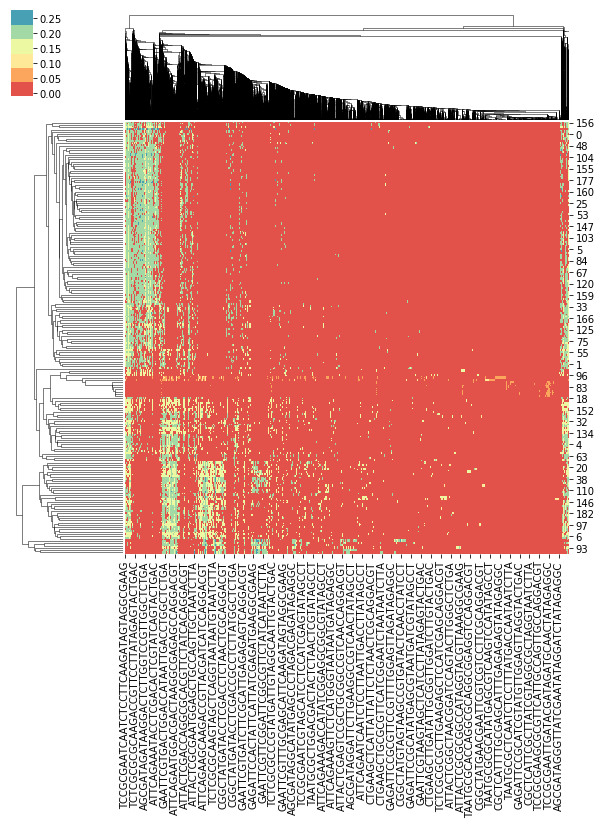

In [12]:
import seaborn as sns
correlation_matrix = pd.read_csv('Figure-5-data-code/correlation_matrix_mESC.txt', sep=" ", index_col=0)
sns.color_palette("viridis")
ax = sns.clustermap(correlation_matrix,cmap=sns.color_palette("Spectral"))
# ax.savefig('./scepisearch_query_results/heatmap.png')

In [13]:
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
# retrieve clusters using fcluster 
d = sch.distance.pdist(correlation_matrix)
L = sch.linkage(d, method='complete')
# 0.2 can be modified to retrieve more stringent or relaxed clusters
clusters = sch.fcluster(L, 0.8*d.max(), 'distance')

final_labels= []
# clusters indicices correspond to incides of original df
for i,cluster in enumerate(clusters):
    print(correlation_matrix.index[i], cluster)
    final_labels.append(cluster)

0 4
1 4
2 4
3 4
4 3
5 4
6 3
7 4
8 2
9 4
10 3
11 4
12 4
13 4
14 3
15 1
16 3
17 4
18 4
19 4
20 2
21 4
22 3
23 4
24 3
25 4
26 3
27 4
28 2
29 4
30 4
31 4
32 3
33 4
34 2
35 4
36 3
37 4
38 2
39 1
40 4
41 3
42 3
43 4
44 3
45 4
46 3
47 4
48 4
49 4
50 3
51 4
52 2
53 4
54 3
55 4
56 4
57 4
58 2
59 4
60 4
61 4
62 4
63 3
64 2
65 4
66 3
67 4
68 4
69 4
70 3
71 4
72 4
73 4
74 1
75 4
76 4
77 2
78 2
79 4
80 4
81 4
82 4
83 4
84 4
85 4
86 4
87 4
88 2
89 4
90 4
91 4
92 4
93 1
94 4
95 3
96 4
97 3
98 3
99 4
100 4
101 3
102 4
103 4
104 4
105 4
106 2
107 3
108 4
109 4
110 2
111 4
112 4
113 3
114 4
115 4
116 2
117 3
118 2
119 4
120 4
121 3
122 4
123 4
124 4
125 4
126 4
127 4
128 4
129 2
130 4
131 4
132 4
133 4
134 3
135 4
136 4
137 4
138 4
139 3
140 4
141 4
142 4
143 4
144 4
145 2
146 3
147 4
148 3
149 4
150 3
151 4
152 3
153 4
154 3
155 4
156 4
157 3
158 4
159 4
160 4
161 4
162 3
163 4
164 4
165 3
166 4
167 3
168 3
169 4
170 4
171 2
172 3
173 4
174 4
175 4
176 3
177 4
178 4
179 4
180 4
181 4
182 3
183 4
184 2


In [14]:
np.unique(final_labels)

array([1, 2, 3, 4], dtype=int32)

In [90]:
pd.Series(final_labels).to_csv("Figure-5-data-code/knn_cluster_labels_17august.txt",sep="\t")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [21]:
# import pandas as pd
# mesc_top_clusters=pd.read_csv("./scepisearch_query_results/top_clusters.txt",sep=" ",header=None)
# meta = pd.read_csv("./searchProject/meta_mouse/metadata_exp.csv",sep="@")
# meta = meta.iloc[:,2]
# li = []
# clusters = pd.read_csv("./searchProject/storage/scepisearch/mouse/exp_new/clusters_celltype/clusters_final.txt",sep=" ")
# id = clusters['id']
# for i in range(mesc_top_clusters.shape[1]):   
#     li.extend(id[clusters.iloc[:,1].isin(mesc_top_clusters.iloc[:,i])])
# #     idx = clusters.iloc[mesc_top_clusters.iloc[:,i].isin(),0]
# #     print(idx)

In [25]:
hits_new

array([[ 960477, 2078235, 2077856, ..., 2133262,  516357,  245830],
       [ 364209, 2133964, 2078087, ..., 2079807, 2077787,  879555],
       [  74408, 2079754, 2079732, ..., 2134116,  682475, 2077731],
       ...,
       [2079829, 2077908, 2079605, ..., 2078164, 2133658,   20069],
       [2133360, 2078276, 2079811, ...,  837410, 1282921,  117188],
       [2079831, 2079403,  931808, ..., 2133045, 2077664,  254903]])

In [27]:
hits_new = np.loadtxt("Figure-5-data-code/knn_mESC_results_index.txt",delimiter=" ")
hits_new = hits_new.astype('int')
metadata = pd.read_csv("Figure-5-data-code/metadata_exp.csv", header=None,sep="@")
metadata = metadata.ix[:,2]
metadata = np.array(metadata)
cells = metadata[np.ravel(hits_new)]
cells_forebrain = pd.DataFrame(np.reshape(cells, (188,10)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [50]:
# cells_forebrain.to_csv("Figure-5-data-code/hits_mESC_meta.txt",sep="\t")
# np.savetxt("Figure-5-data-code/hits_mESC_pvalues.txt",pvalues_new,delimiter=" ")
# np.savetxt("Figure-5-data-code/hits_mESC_exp.txt",hits_new,delimiter=" ",fmt='%i')

In [60]:
index = np.loadtxt('Figure-5-data-code/knn_mESC_results_index.txt',delimiter=" ")
index = np.transpose(index)

In [61]:
# np.savetxt('Figure-5-data-code/knn_mESC_results_index_17august_new.txt',index,delimiter=" ")

In [62]:
# final_corr = np.loadtxt("./scepisearch_query_results/knn_mESC_results_index_17august.txt",delimiter=" ")
final_corr  = index.astype(int)
metadata = pd.read_csv("Figure-5-data-code/metadata_exp.csv", header=None,sep="@")
metadata = metadata.ix[:,2]
metadata = np.array(metadata)
final_corr = final_corr.astype(int)
cells = metadata[np.ravel(final_corr)]
cells_forebrain = pd.DataFrame(np.reshape(cells, (10,188)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [63]:
# cells_forebrain = pd.read_csv("./scepisearch_query_results/knn_hits_17august_meta.txt",sep=",",index_col=0)
pd.Series(cells_forebrain.values.ravel()).dropna().value_counts()

Embryonic stem cell                                          186
Epithelial cells                                             151
ES_Actb_high(Embryonic-Stem-Cell)                            148
Excitatory neurons                                           142
epiblast cell                                                123
2-cell embryo                                                105
Connective tissue progenitors                                104
Postmitotic premature neurons                                 80
embryo 14                                                     73
embryo 7                                                      66
Intermediate Mesoderm                                         56
embryo 10                                                     50
Endothelial cells                                             50
embryo 9                                                      49
4-cell embryo                                                 40
Inhibitory neurons       

In [66]:
cells_forebrain.shape

(4, 188)

In [67]:
cells_forebrain = cells_forebrain.iloc[:4,:]
# cells_forebrain = cells_forebrain.T
cells_forebrain.columns = final_labels
data_c1 = cells_forebrain.filter(like='1',axis=1)
data_c2 = cells_forebrain.filter(like='2',axis=1)
data_c3 = cells_forebrain.filter(like='3',axis=1)
data_c4 = cells_forebrain.filter(like='4',axis=1)
print(data_c1.shape)
print(data_c2.shape)
print(data_c3.shape)
print(data_c4.shape)
data_c1 = pd.Series(data_c1.values.ravel()).dropna().value_counts()
data_c2 = pd.Series(data_c2.values.ravel()).dropna().value_counts()
data_c3 = pd.Series(data_c3.values.ravel()).dropna().value_counts()
data_c4 = pd.Series(data_c4.values.ravel()).dropna().value_counts()

(4, 4)
(4, 19)
(4, 44)
(4, 121)


In [68]:
index.shape

(10, 188)

In [69]:
cells_forebrain.shape

(4, 188)

In [71]:
cells_forebrain = cells_forebrain.T
index = np.transpose(index)
print(index.shape)
index = index[:,:4]
print(cells_forebrain.shape)
locs = index[cells_forebrain=='Late blastocyst cell (100-102h post-fertilization)',]

(188, 10)
(188, 4)


In [1]:
# ind_late = cells_forebrain.columns[cells_forebrain.isin(['Late blastocyst cell (100-102h post-fertilization)']).any()]
# ind_early = cells_forebrain.columns[cells_forebrain.isin(['Early blastocyst cell (86-88h post-fertilization)']).any()]

# data = np.loadtxt("/data1/shreya/17august_mESC_knn_coverage/final_data_count_coverage.txt",delimiter=",")
# data = pd.DataFrame(data)
# data_late = data.iloc[:,ind_late]
# data_early = data.iloc[:,ind_early]
# print(data_late.shape)
# print(data_early.shape)
# data_late.to_csv("/data1/shreya/17august_mESC_knn_coverage/knn_mESC_late.txt",sep=",")
# data_early.to_csv("/data1/shreya/17august_mESC_knn_coverage/knn_mESC_early.txt",sep=",")

In [74]:
data = np.loadtxt("Figure-5-data-code/final_data_count_coverage.txt",delimiter=",")
peak_median = np.median(data,axis=1)
print(peak_median.shape)


peak = pd.read_csv("Figure-5-data-code/final_data_peak_coverage.bed",header=None,sep="\t")
peak.columns = ['chr','start','end']
peak["comb"] = peak['chr']+"_"+peak['start'].astype('str')+"_"+peak['end'].astype('str')
# acc_score_path = './acc_score.csv'
# acc_score = pd.read_csv(acc_score_path,sep=" ",header=None)
# acc_score[acc_score == 0] = 1
data1 = pd.read_csv("Figure-5-data-code/mESC_late_count.txt",sep=",",index_col=0)
# peak = peak.loc[~np.all(data1 == 0, axis=1),:]
# acc_score = np.array(acc_score)[~np.all(data1 == 0, axis=1)]
# data1 = data1[~np.all(data1 == 0, axis=1)]
print(data1.shape)
data1 = np.mean(data1,axis=1)
# print(acc_score)
data1 = data1/peak_median.ravel()
print(data1.shape)
data1 = pd.DataFrame(data1)
data1.index = peak['comb']
data1.columns = ['A']
data1.sort_values(by='A',ascending=False, inplace=True)
# pd.DataFrame(data1.index[:2000]).to_csv('Figure-5-data-code/knn_late_2000peaks.csv',index=False,header=False)
# pd.DataFrame(data1.index[:10000]).to_csv('Figure-5-data-code/knn_late_10000peaks.csv',index=False,header=False)


(53608,)
(53608, 16)
(53608,)


In [75]:
data_c3.index.difference(data_c4.index)

Index(['2-cell stage blastomere', '4-cell stage blastomere',
       'Embryonic fibroblast', 'mouse oocyte'],
      dtype='object')

In [76]:
data_c4.index.difference(data_c3.index)

Index(['16-cell stage blastomere',
       'Early 2-cell stage blastomere (31-32h post-fertilization)',
       'Late 2-cell stage blastomere (46-48h post-fertilization)',
       'Mid 2-cell stage blastomere (34-40h post-fertilization)',
       'Schwann cell precursor', 'blastocyst', 'embryo 11', 'mouse 4-cell',
       'mouse ES cell', 'mouse blastocyst', 'mouse zygote'],
      dtype='object')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


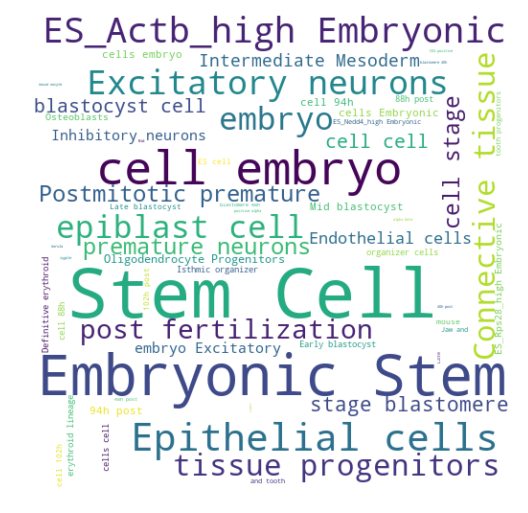

In [84]:
#word cloud
import matplotlib.pyplot as plt
final_corr = np.loadtxt("Figure-5-data-code/knn_mESC_results_index.txt",delimiter=" ")
final_corr  = final_corr.astype(int)
metadata = pd.read_csv("Figure-5-data-code/metadata_exp.csv", header=None,sep="@")
metadata = metadata.ix[:,2]
metadata = np.array(metadata)
final_corr = final_corr.astype(int)
cells = metadata[np.ravel(final_corr)]
cells_forebrain = pd.DataFrame(np.reshape(cells, (10,188)))
cells_forebrain = cells_forebrain.T

pvalues_new = np.loadtxt("Figure-5-data-code/mESC_knn_results_pvalue.txt",delimiter=" ")
meta_1000 = pd.read_csv("Figure-5-data-code/knn_hits_17august_meta.txt",sep="\t",index_col=0)
cells_all = np.ravel(cells_forebrain)
cells_forebrain[pvalues_new>0.021] = ""
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
cells_all = np.array(cells_all)
#print(cells_all)
cells_all = cells_all.astype(str)
comment_words += " ".join(cells_all)+" "
wordcloud = WordCloud(width = 500, height = 500, background_color ='white', stopwords = stopwords).generate(comment_words) 

plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [93]:
old_cluster_labels = pd.read_csv('Figure-5-data-code/knn_cluster_labels_17august.txt',sep="\t",index_col=0,header=None)
data = np.loadtxt("Figure-5-data-code/final_data_count_coverage.txt",delimiter=",")
data = pd.DataFrame(data)
data.drop([55,71],axis=1, inplace=True)
data.columns = old_cluster_labels
data_c1 = data.filter(like='1',axis=1)
data_c2 = data.filter(like='2',axis=1)
data_c3 = data.filter(like='3',axis=1)
data_c4 = data.filter(like='4',axis=1)
print(data_c1.shape)
print(data_c2.shape)
print(data_c3.shape)
print(data_c4.shape)
# data_c1.to_csv("Figure-5-data-code/knn_mESC_cluster_1_count_oldclusters.txt",sep=",")
# data_c2.to_csv("Figure-5-data-code/knn_mESC_cluster_2_count_oldclusters.txt",sep=",")
# data_c3.to_csv("Figure-5-data-code/knn_mESC_cluster_3_count_oldclusters.txt",sep=",")
# data_c4.to_csv("Figure-5-data-code/knn_mESC_cluster_4_count_oldclusters.txt",sep=",")

(53608, 4)
(53608, 19)
(53608, 44)
(53608, 121)


In [2]:
# data = np.loadtxt("/data1/shreya/17august_mESC_knn_coverage/final_data_count_coverage.txt",delimiter=",")
# data = pd.DataFrame(data)
# data.columns = old_cluster_labels
# data_c1 = data.filter(like='c1',axis=1)
# data_c2 = data.filter(like='c2',axis=1)
# data_c3 = data.filter(like='c3',axis=1)
# data_c4 = data.filter(like='c4',axis=1)
# print(data_c1.shape)
# print(data_c2.shape)
# print(data_c3.shape)
# print(data_c4.shape)
# data_c1.to_csv("/data1/shreya/17august_mESC_knn_coverage/knn_mESC_cluster_1_count_oldclusters.txt",sep=",")
# data_c2.to_csv("/data1/shreya/17august_mESC_knn_coverage/knn_mESC_cluster_2_count_oldclusters.txt",sep=",")
# data_c3.to_csv("/data1/shreya/17august_mESC_knn_coverage/knn_mESC_cluster_3_count_oldclusters.txt",sep=",")
# data_c4.to_csv("/data1/shreya/17august_mESC_knn_coverage/knn_mESC_cluster_4_count_oldclusters.txt",sep=",")

In [95]:
data = np.loadtxt("Figure-5-data-code/final_data_count_coverage.txt",delimiter=",")
peak_median = np.median(data,axis=1)
print(peak_median.shape)

peak = pd.read_csv("Figure-5-data-code/final_data_peak_coverage.bed",header=None,sep="\t")
peak.columns = ['chr','start','end']
peak["comb"] = peak['chr']+"_"+peak['start'].astype('str')+"_"+peak['end'].astype('str')
# acc_score_path = './acc_score.csv'
# acc_score = pd.read_csv(acc_score_path,sep=" ",header=None)
# acc_score[acc_score == 0] = 1
data1 = pd.read_csv("Figure-5-data-code/mESC_cluster_4_count.txt",sep=",",index_col=0)
# peak = peak.loc[~np.all(data1 == 0, axis=1),:]
# acc_score = np.array(acc_score)[~np.all(data1 == 0, axis=1)]
# data1 = data1[~np.all(data1 == 0, axis=1)]
# print(data1.shape)
data1 = np.mean(data1,axis=1)
# print(acc_score)
data1 = data1/peak_median.ravel()
# print(data1.shape)
data1 = pd.DataFrame(data1)
data1.index = peak['comb']
data1.columns = ['A']
data1.sort_values(by='A',ascending=False, inplace=True)
# pd.DataFrame(data1.index[:2000]).to_csv('Figure-5-data-code/knn_cluster4_2000peaks_oldclusters.csv',index=False,header=False)
# pd.DataFrame(data1.index[:10000]).to_csv('Figure-5-data-code/knn_cluster4_10000peaks_oldclusters.csv',index=False,header=False)

(53608,)
